In [1]:
import pandas as pd
import numpy as np

In [2]:
#import plotting library
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

In [3]:
df_annotated = pd.read_table('data/final/cf_report_pp_test100.csv', sep=',', encoding='utf-8', header=0)
df_annotated.shape

(100, 12)

In [153]:
#df_annotated.head(1)

In [5]:
#remove bad data
#-1 was loading error in annotation
df = df_annotated[(df_annotated['1_is_of_high_quality'] != -1) & (df_annotated['2_is_informative'] != -1) & (df_annotated['3_relevant_to_event'] != -1)]
df.shape

(99, 12)

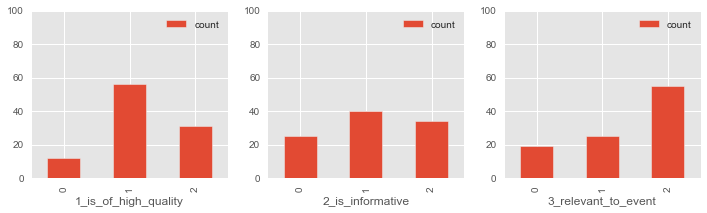

In [6]:
fig = plt.figure(figsize=(12, 3))
plt.subplot(1,3,1)
df.groupby('1_is_of_high_quality')['twitter_id'].agg(['count']).plot(ax=plt.gca(), kind='bar', ylim=(0,100))
plt.subplot(1,3,2)
df.groupby('2_is_informative')['twitter_id'].agg(['count']).plot(ax=plt.gca(), kind='bar', ylim=(0,100))
plt.subplot(1,3,3)
df.groupby('3_relevant_to_event')['twitter_id'].agg(['count']).plot(ax=plt.gca(), kind='bar', ylim=(0,100))

In [10]:
#get a matrix of annotations, for analysis
#uncomment next line to view all, else review heatmaps below
df.groupby(['3_relevant_to_event', '2_is_informative', '1_is_of_high_quality'])['twitter_id'].agg(['count']).unstack()

count            
1_is_of_high_quality                     0     1     2
3_relevant_to_event 2_is_informative                  
0                   0                  7.0   6.0   NaN
                    1                  NaN   3.0   NaN
                    2                  NaN   1.0   2.0
1                   0                  4.0   4.0   NaN
                    1                  NaN  12.0   NaN
                    2                  NaN   2.0   3.0
2                   0                  1.0   2.0   1.0
                    1                  NaN  17.0   8.0
                    2                  NaN   9.0  17.0

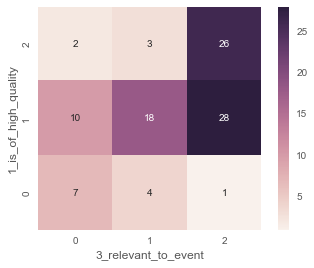

In [7]:
x = df.groupby(['1_is_of_high_quality', '3_relevant_to_event'])['twitter_id'].count().unstack(fill_value=0)
ax = sns.heatmap(x, annot=True, fmt="d", square=True)
ax.invert_yaxis()

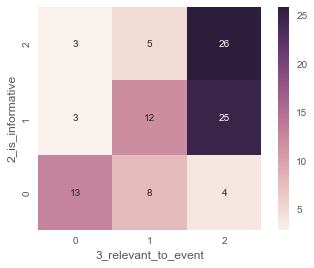

In [8]:
x = df.groupby(['2_is_informative', '3_relevant_to_event'])['twitter_id'].count().unstack(fill_value=0)
ax = sns.heatmap(x, annot=True, fmt="d", square=True)
ax.invert_yaxis()

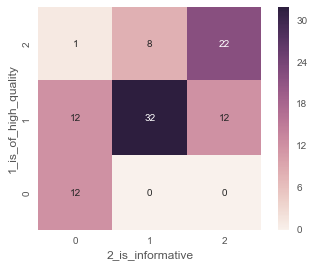

In [9]:
x = df.groupby(['1_is_of_high_quality', '2_is_informative'])['twitter_id'].count().unstack(fill_value=0)
ax = sns.heatmap(x, annot=True, fmt="d", square=True)
ax.invert_yaxis()

In [ ]:
#greedy selection of best documents

In [53]:
#convert date format to python datetime
df['created_at'] = pd.to_datetime(df['created_at'])
#sort for iterating and printing
df = df.sort_values(by='created_at', ascending=True)

In [92]:
#get best documents
#where all classes = "YES" (2)
df_best = df[(df['1_is_of_high_quality'] == 2) & (df['2_is_informative'] == 2) & (df['3_relevant_to_event'] == 2)]

In [94]:
for _,doc in df_best.iterrows():
    print('%s\n %s' % (doc['created_at'], doc['text']))

2016-04-03 18:09:17
 BBC News - Panama Papers: Mossack Fonseca leak reveals elite's tax havens https://t.co/3rUFtZRhBD
2016-04-03 18:52:29
 Panama Papers: Mossack Fonseca leak reveals elite's tax havens https://t.co/9RgEe9i3Rc
2016-04-03 21:07:03
 #PanamaPapers watch @inkyfada tonight for the biggest leak in history or journalism
2016-04-03 22:48:43
 Panama Papers: '100 times bigger than Wikileaks' and 'the largest global investigation in history.' https://t.co/IpeLlYBfN8
2016-04-04 06:04:28
 Panama Papers name Amitabh Bachchan, Aishwarya Rai among 500 Indians with hidden assets: Other noted Indians n... https://t.co/QV9qkK3kal
2016-04-04 13:53:07
 Giant Leak of Offshore Financial Records Exposes Global Array of Crime and Corruption https://t.co/kXM8AiXNR2 via @occrp
2016-04-05 08:14:00
 Panama Papers: Obama, Clinton Pushed Trade Deal Amid Warnings It Would Make Money Laundering, Tax Evasion Worse https://t.co/wgqgtzuC3V
2016-04-05 11:45:11
 Panama leak: Modi govt trying to brush aside

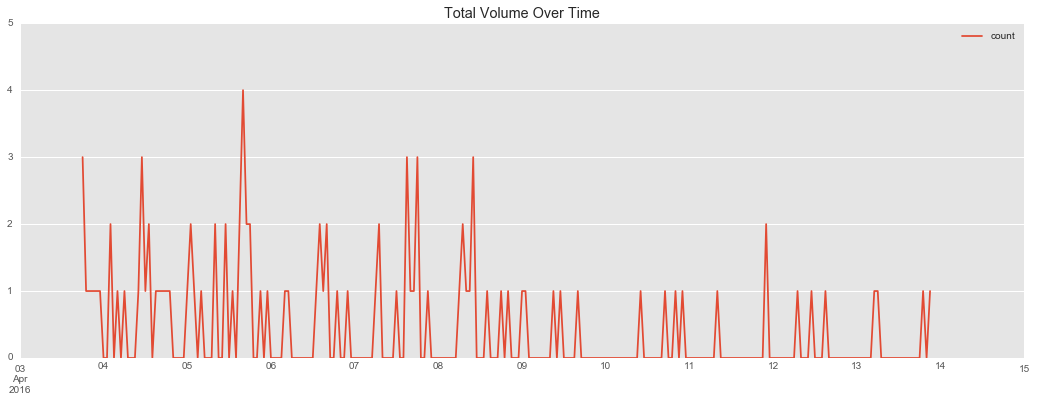

In [222]:
#count tweets, grouped by hour
#first adding timestamp as index for built in TimeGrouper
d = df.set_index('created_at').groupby([pd.TimeGrouper(freq='H')])['twitter_id'].agg(['count'])
#reindex for time series plotting
#creates missing rows in timeline gaps
#fill defaul NaN with 0
d = d.reindex(pd.date_range(min(d.index), max(d.index), freq='H')).fillna(0)
#plot tweet count by hour
ax = d.plot(xlim=(pd.to_datetime('2016-04-03 00:00:00'), pd.to_datetime('2016-04-15 00:00:00')),
            ylim=(0,5),
            figsize=(18,6),
            legend=True,
            title='Total Volume Over Time')

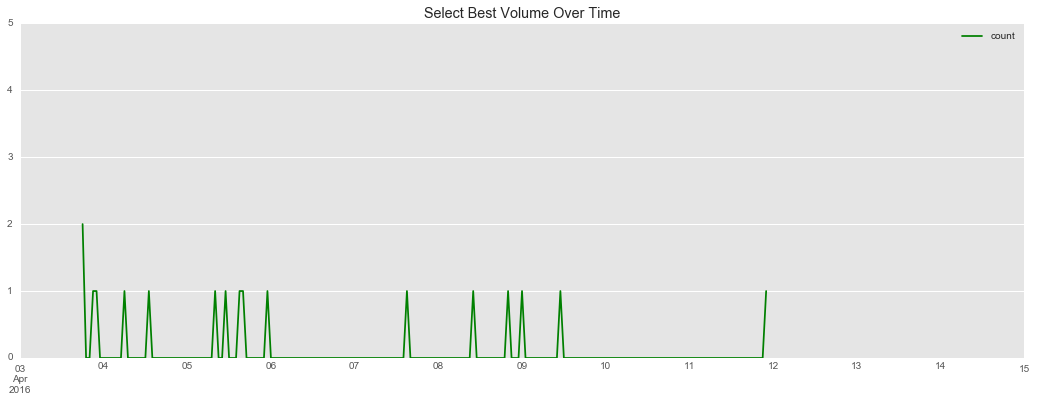

In [221]:
#count tweets, grouped by hour
#first adding timestamp as index for built in TimeGrouper
d = df_best.set_index('created_at').groupby([pd.TimeGrouper(freq='H')])['twitter_id'].agg(['count'])
#reindex for time series plotting
#creates missing rows in timeline gaps
#fill defaul NaN with 0
d = d.reindex(pd.date_range(min(d.index), max(d.index), freq='H')).fillna(0)
#plot tweet count by hour
ax = d.plot(xlim=(pd.to_datetime('2016-04-03 00:00:00'), pd.to_datetime('2016-04-15 00:00:00')),
            ylim=(0,5),
            figsize=(18,6),
            legend=True,
            label='Best',
            c='g',
            title='Select Best Volume Over Time')

In [226]:
#get worst documents ignoring relevance
#where quality, informativeness classes = "No" (0)
df_worst = df[(df['1_is_of_high_quality'] == 0) & (df['2_is_informative'] == 0)]

In [227]:
for _,doc in df_worst.iterrows():
    print('%s\n %s' % (doc['created_at'], doc['text']))

2016-04-05 00:26:21
 #mychoice Panama Papers: Offshore entities’ details of Garware family, Apollo Tyres promoters, 9 others https://t.co/pdzZ8vP7Md
2016-04-05 02:10:02
 Get'n a whiff that an election (+ a few candidates) would go bust if the papers leak US deets. Or maybe is the smell of a burnt paper trail🤔
2016-04-05 08:37:24
 panama papers finally starting to flood my fb feed FINALLY
2016-04-05 18:22:00
 @toohsuite Panama Papers and America's problem
2016-04-06 04:04:13
 @joshgondelman i'm an old classmate of yours.... what's this tweet referencing? Panama papers? Views on gay rights? https://t.co/HXprOgLmoC
2016-04-06 16:58:52
 International Elite Tax Dodging Conspiracy Unearthed | Panama Papers So angry!Wtf does it take for us to say HELL NO https://t.co/AeruP1VsJH
2016-04-07 15:58:23
 @smerry95 @nanosounds she put all the money on an offshore account already ( ͡° ͜ʖ ͡°)
2016-04-07 18:50:58
 Time the lying toad Cameron resigns, not in June, not in 2020 but NOW! He Lied! Wake up p